In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import time
import matplotlib.pyplot as plt

import sys
import os

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


measure_sampling_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/Measure_sampling')
CD_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/Conditional_density')

if measure_sampling_path not in sys.path:
    sys.path.append(measure_sampling_path)

if CD_path not in sys.path:
    sys.path.append(CD_path)

from Gen_Path_and_AdaptedTrees import *

from CD_knn_NerualNet import *

from IPython.display import display, clear_output

In [3]:
# Generate Brownian motion paths
n_data =  3000
time_steps = 3  # For example, t=0, t=1, t=2, t=3
paths = generate_brownian_motion(num_paths=n_data, time_steps=time_steps, scale=1)

# For conditional density estimation, let X be the time coordinate and Y be the Brownian value.
# One approach is to consider each path as:
# X = [time indices] and Y = [Brownian values]
# Here, we create a dataset where for each time step (except the first), we estimate the conditional density given the previous time.

# Example: use t=1 as X and t=2 as Y (this is a simplification)
X = np.expand_dims(paths[:, 1], axis=1)  # shape: (num_paths, 1)
Y = np.expand_dims(paths[:, 2], axis=1)  # shape: (num_paths, 1)
d_X = 1
d_Y = 1

# Concatenate to form a data tensor: first column(s) for X and the remaining for Y.
data = np.concatenate([X, Y], axis=1)  # shape: (num_paths, 2)

# Convert to a PyTorch tensor
data_tensor = torch.tensor(data, dtype=torch.float32).to(device)

## for non Lip

Training progress: 0/1499
Training progress: 100/1499
Training progress: 200/1499
Training progress: 300/1499
Training progress: 400/1499
Training progress: 500/1499
Training progress: 600/1499
Training progress: 700/1499
Training progress: 800/1499
Training progress: 900/1499
Training progress: 1000/1499
Training progress: 1100/1499
Training progress: 1200/1499
Training progress: 1300/1499
Training progress: 1400/1499
Training took 32.15 seconds.
Number of NaN losses encountered: 22


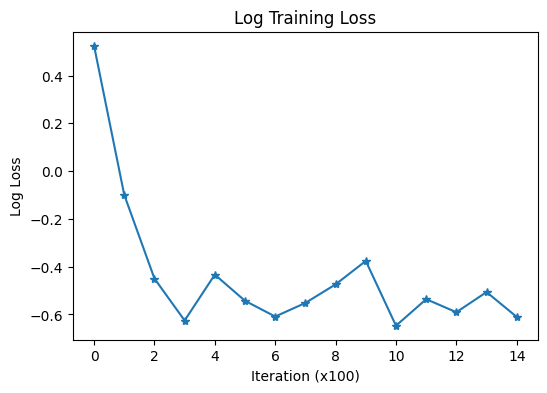

Trained estimator for k = 2. Number of NaN losses encountered: 22
tensor([[[ 0.5523],
         [-0.6422]]])
tensor([[[1.4573],
         [0.3796]]])
tensor([[[2.8048],
         [1.6957]]])
tensor([[[1.2478],
         [0.1073]]])
Training progress: 0/1499
Training progress: 100/1499
Training progress: 200/1499
Training progress: 300/1499
Training progress: 400/1499
Training progress: 500/1499
Training progress: 600/1499
Training progress: 700/1499
Training progress: 800/1499
Training progress: 900/1499
Training progress: 1000/1499
Training progress: 1100/1499
Training progress: 1200/1499
Training progress: 1300/1499
Training progress: 1400/1499
Training took 39.53 seconds.
Number of NaN losses encountered: 2


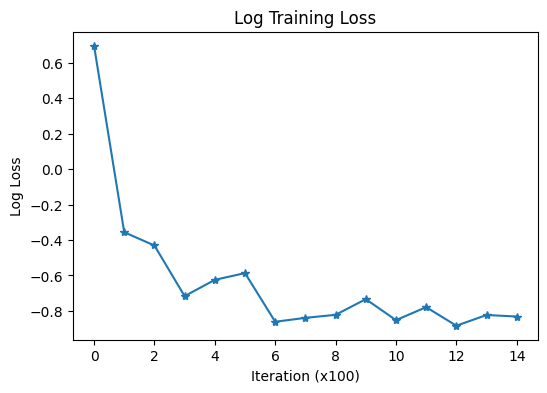

Trained estimator for k = 3. Number of NaN losses encountered: 2
tensor([[[-0.2880],
         [ 0.8170],
         [-0.2126]]])
tensor([[[0.3110],
         [1.7717],
         [1.1680]]])
tensor([[[2.2181],
         [1.3926],
         [3.3516]]])
tensor([[[0.0564],
         [1.6625],
         [0.8969]]])
Training progress: 0/1499
Training progress: 100/1499
Training progress: 200/1499
Training progress: 300/1499
Training progress: 400/1499
Training progress: 500/1499
Training progress: 600/1499
Training progress: 700/1499
Training progress: 800/1499
Training progress: 900/1499
Training progress: 1000/1499
Training progress: 1100/1499
Training progress: 1200/1499
Training progress: 1300/1499
Training progress: 1400/1499
Training took 42.02 seconds.
Number of NaN losses encountered: 0


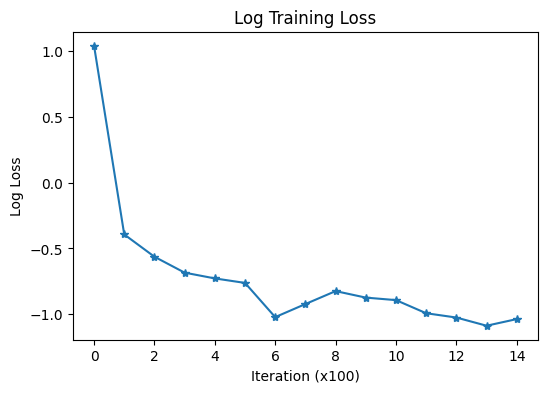

Trained estimator for k = 4. Number of NaN losses encountered: 0
tensor([[[-0.0275],
         [ 1.1430],
         [-1.1130],
         [ 0.4578]]])
tensor([[[ 0.7629],
         [ 1.8907],
         [-0.1510],
         [ 1.1491]]])
tensor([[[2.0507],
         [2.5126],
         [0.9910],
         [3.1818]]])
tensor([[[ 0.5798],
         [ 1.8202],
         [-0.4088],
         [ 1.0226]]])
Training progress: 0/1499
Training progress: 100/1499
Training progress: 200/1499
Training progress: 300/1499
Training progress: 400/1499
Training progress: 500/1499
Training progress: 600/1499
Training progress: 700/1499
Training progress: 800/1499
Training progress: 900/1499
Training progress: 1000/1499
Training progress: 1100/1499
Training progress: 1200/1499
Training progress: 1300/1499
Training progress: 1400/1499
Training took 33.34 seconds.
Number of NaN losses encountered: 0


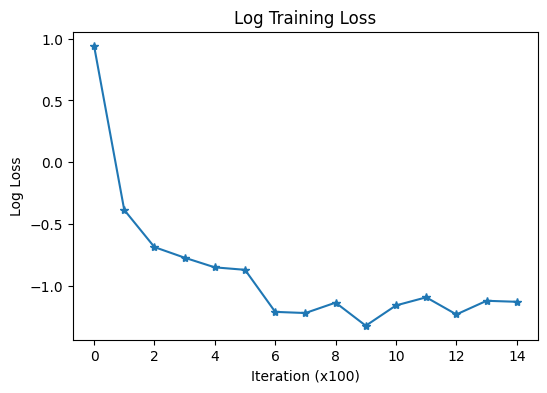

Trained estimator for k = 5. Number of NaN losses encountered: 0
tensor([[[-1.1636],
         [ 1.0204],
         [-0.1018],
         [-0.5131],
         [ 0.6119]]])
tensor([[[-0.1831],
         [ 1.9411],
         [ 1.4599],
         [ 0.4172],
         [ 0.9918]]])
tensor([[[0.5025],
         [2.6113],
         [3.1624],
         [1.3540],
         [2.2993]]])
tensor([[[-0.6036],
         [ 1.9076],
         [ 1.0654],
         [ 0.1518],
         [ 0.7097]]])
Training progress: 0/1499
Training progress: 100/1499
Training progress: 200/1499
Training progress: 300/1499
Training progress: 400/1499
Training progress: 500/1499
Training progress: 600/1499
Training progress: 700/1499
Training progress: 800/1499
Training progress: 900/1499
Training progress: 1000/1499
Training progress: 1100/1499
Training progress: 1200/1499
Training progress: 1300/1499
Training progress: 1400/1499
Training took 60.09 seconds.
Number of NaN losses encountered: 0


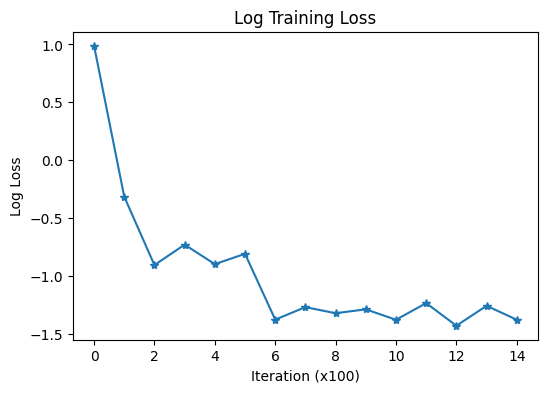

Trained estimator for k = 6. Number of NaN losses encountered: 0
tensor([[[-0.1065],
         [ 0.6890],
         [ 0.4129],
         [-0.5586],
         [ 1.1918],
         [-0.9385]]])
tensor([[[ 1.0375],
         [ 0.7742],
         [ 1.8672],
         [ 0.4219],
         [ 1.8597],
         [-0.2019]]])
tensor([[[3.1101],
         [2.0286],
         [3.3396],
         [1.5651],
         [2.4658],
         [0.7471]]])
tensor([[[ 0.7337],
         [ 0.5925],
         [ 1.3789],
         [ 0.1068],
         [ 2.1208],
         [-0.4406]]])
Training progress: 0/1499
Training progress: 100/1499
Training progress: 200/1499
Training progress: 300/1499
Training progress: 400/1499
Training progress: 500/1499
Training progress: 600/1499
Training progress: 700/1499
Training progress: 800/1499
Training progress: 900/1499
Training progress: 1000/1499
Training progress: 1100/1499
Training progress: 1200/1499
Training progress: 1300/1499
Training progress: 1400/1499
Training took 43.69 seconds.
N

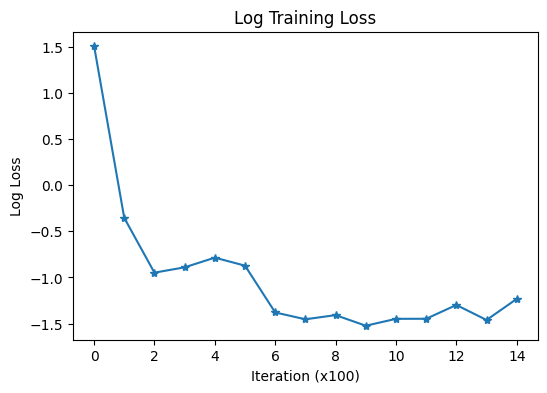

Trained estimator for k = 7. Number of NaN losses encountered: 0
tensor([[[ 1.2717],
         [ 0.8105],
         [-0.6638],
         [-0.4341],
         [ 0.3314],
         [-1.3123],
         [ 0.0232]]])
tensor([[[ 2.2054],
         [ 1.3078],
         [-0.3239],
         [ 0.3454],
         [ 1.5353],
         [-0.0114],
         [ 0.7546]]])
tensor([[[3.4350],
         [1.5480],
         [0.4822],
         [2.3120],
         [2.7831],
         [1.7121],
         [2.6008]]])
tensor([[[ 2.1412],
         [ 1.1478],
         [-0.1859],
         [ 0.2558],
         [ 1.4307],
         [-0.5808],
         [ 0.6048]]])
Training progress: 0/1499
Training progress: 100/1499
Training progress: 200/1499
Training progress: 300/1499
Training progress: 400/1499
Training progress: 500/1499
Training progress: 600/1499
Training progress: 700/1499
Training progress: 800/1499
Training progress: 900/1499
Training progress: 1000/1499
Training progress: 1100/1499
Training progress: 1200/1499
Training 

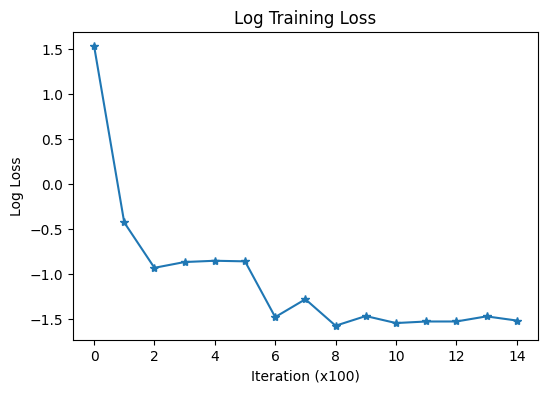

Trained estimator for k = 8. Number of NaN losses encountered: 0
tensor([[[ 0.5502],
         [ 1.3380],
         [ 0.1483],
         [-1.3122],
         [-0.1429],
         [-0.2970],
         [-0.7992],
         [ 0.8328]]])
tensor([[[ 1.3222],
         [ 2.3378],
         [ 1.7009],
         [-0.4142],
         [ 0.5771],
         [ 1.1371],
         [ 0.2081],
         [ 0.8561]]])
tensor([[[1.3053],
         [2.9751],
         [2.2969],
         [1.3516],
         [2.0097],
         [3.7106],
         [0.3825],
         [2.6118]]])
tensor([[[ 1.1897],
         [ 2.2704],
         [ 1.6366],
         [-0.7364],
         [ 0.3978],
         [ 0.7779],
         [-0.1156],
         [ 0.7384]]])
Training progress: 0/1499
Training progress: 100/1499
Training progress: 200/1499
Training progress: 300/1499
Training progress: 400/1499
Training progress: 500/1499
Training progress: 600/1499
Training progress: 700/1499
Training progress: 800/1499
Training progress: 900/1499
Training progress

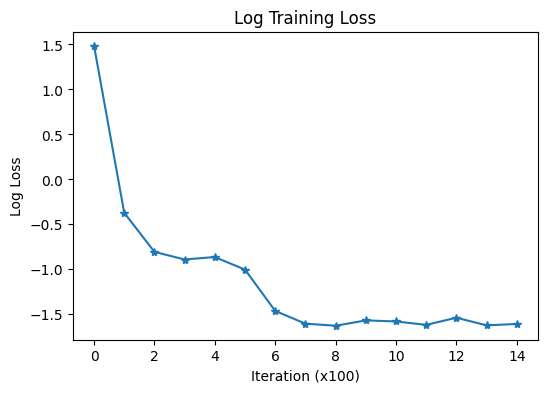

Trained estimator for k = 9. Number of NaN losses encountered: 0
tensor([[[-0.8026],
         [ 0.5312],
         [-0.3218],
         [ 0.7600],
         [-1.3629],
         [-0.0306],
         [ 1.6067],
         [-0.1592],
         [ 1.1109]]])
tensor([[[ 0.0850],
         [ 0.6323],
         [ 0.3262],
         [ 1.5373],
         [-0.4575],
         [ 0.9618],
         [ 2.5241],
         [ 0.8966],
         [ 1.8255]]])
tensor([[[1.3799],
         [2.3046],
         [1.9057],
         [3.1503],
         [0.2326],
         [2.6313],
         [3.2991],
         [1.4054],
         [3.8595]]])
tensor([[[-0.1797],
         [ 0.5414],
         [ 0.1623],
         [ 1.3634],
         [-0.7290],
         [ 0.8575],
         [ 2.4288],
         [ 0.6126],
         [ 1.7375]]])
Training progress: 0/1499
Training progress: 100/1499
Training progress: 200/1499
Training progress: 300/1499
Training progress: 400/1499
Training progress: 500/1499
Training progress: 600/1499
Training progress: 700

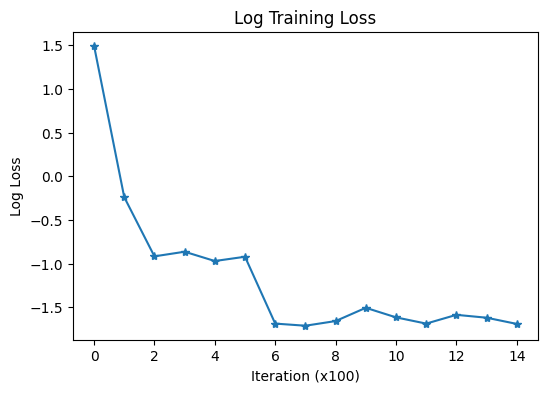

Trained estimator for k = 10. Number of NaN losses encountered: 0
tensor([[[-1.4159],
         [ 0.0379],
         [ 0.2958],
         [-0.1512],
         [-0.4565],
         [-0.7828],
         [ 1.5483],
         [ 0.8805],
         [ 0.5102],
         [-0.2921]]])
tensor([[[-0.6742],
         [ 1.0989],
         [ 1.3889],
         [ 0.4905],
         [ 0.5727],
         [-0.0743],
         [ 1.9998],
         [ 2.2129],
         [ 0.7285],
         [ 0.9201]]])
tensor([[[1.3980],
         [1.1573],
         [1.9011],
         [2.3030],
         [2.9951],
         [2.0709],
         [3.9984],
         [3.0486],
         [0.2601],
         [2.5475]]])
tensor([[[-1.0270],
         [ 0.7688],
         [ 1.1009],
         [-0.1606],
         [ 0.4271],
         [-0.3800],
         [ 2.4271],
         [ 1.6739],
         [ 0.4261],
         [ 0.7990]]])


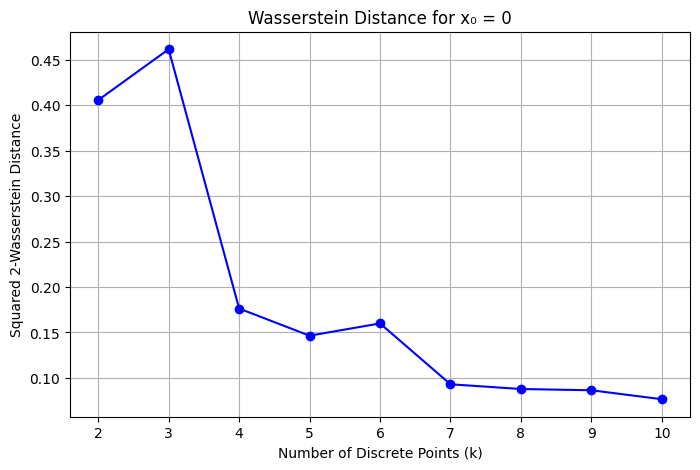

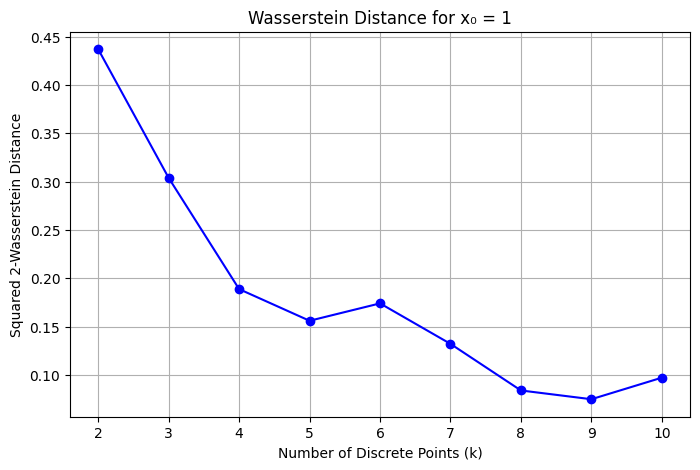

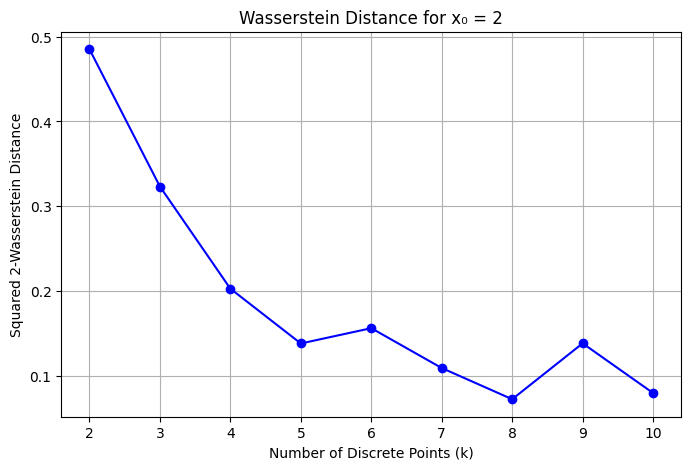

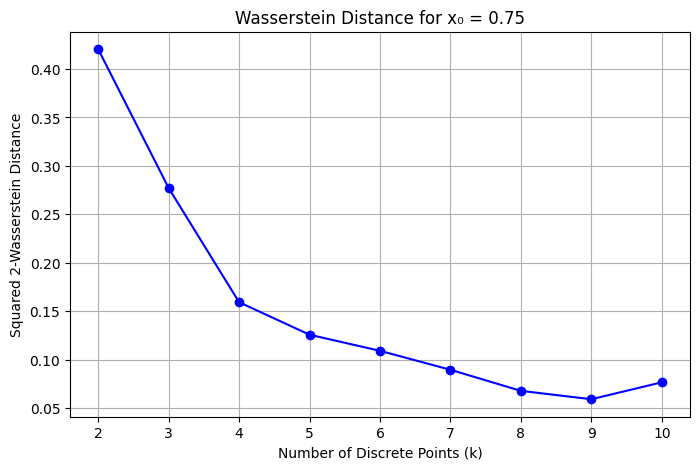

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import ot  # Make sure POT (Python Optimal Transport) is installed

# --- User defined functions ---

def compute_w2_squared(discrete_support, discrete_weights, true_support, true_weights):
    """
    Compute squared 2-Wasserstein distance between two discrete measures.
    discrete_support: 1D numpy array of support points (length m)
    discrete_weights: 1D numpy array of weights (length m, summing to 1)
    true_support: 1D numpy array of support points for the true measure (length n)
    true_weights: 1D numpy array of weights for the true measure (length n, summing to 1)
    """
    # Compute the squared Euclidean cost matrix between the supports.
    M = (discrete_support[:, None] - true_support[None, :])**2
    # ot.emd2 returns the squared Wasserstein distance
    return ot.emd2(discrete_weights, true_weights, M)

# --- Parameters and settings ---
x0_values = [0, 1, 2, 0.75]   # the four condition points for evaluation
k_values = range(2, 11)        # k from 2 to 10 (inclusive)
results = {x0: {} for x0 in x0_values}  # will store distances for each x0 and k

# device should be defined (e.g., device = torch.device('cuda') or 'cpu')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# data_tensor, d_X, d_Y, and other hyperparameters are assumed to be defined elsewhere
# For example:
# data_tensor = ...  (your training data as a torch tensor)
# d_X = ... ; d_Y = ...
# Also, the function train_conditional_density is assumed to be defined.
# n_iter, n_batch, lr, and nns_type are set as desired.

# --- Main Loop over k ---
for k in k_values:
    # Train the conditional density estimator for the current k.
    estimator, loss_hist, n_nan = train_conditional_density(
        data_tensor, d_X=d_X, d_Y=d_Y, k=k,
        n_iter=1500, n_batch=100, lr=1e-3, nns_type=' '
    )
    
    estimator.atomnet.to(device)
    estimator.atomnet.eval()
    print(f"Trained estimator for k = {k}. Number of NaN losses encountered: {n_nan}")
    
    # For each x0 value, evaluate the estimator and compute the Wasserstein distance.
    for x0 in x0_values:
        # Evaluate the estimator at x0 (make sure to use a torch tensor of shape [1,1])
        with torch.no_grad():
            x0_tensor = torch.tensor([[x0]], dtype=torch.float32, device=device)
            y_est = estimator.atomnet(x0_tensor)  # assume output shape is [1, k]

        # Convert the output to a 1D numpy array
        y_est_np = y_est.cpu().numpy().flatten()
        
        # Define the estimated measure: k points with uniform weight 1/k.
        weights_est = np.ones(k) / k

        # Create a grid for the true measure. We choose a grid centered at x0.
        y_min = x0 - 5
        y_max = x0 + 5
        y_grid = np.linspace(y_min, y_max, 800)
        dx = y_grid[1] - y_grid[0]
        
        # Construct the true measure as the discretization of N(x0, 1)
        true_pdf = norm.pdf(y_grid, loc=x0, scale=1)
        true_weights = true_pdf * dx
        true_weights = true_weights / np.sum(true_weights)
        
        # Compute the squared Wasserstein distance.
        distance = compute_w2_squared(y_est_np, weights_est, y_grid, true_weights)
        
        # Store the result
        results[x0][k] = distance

# --- Plotting: one plot per x0 ---
for x0 in x0_values:
    ks = sorted(results[x0].keys())
    distances = [results[x0][k] for k in ks]
    
    plt.figure(figsize=(8, 5))
    plt.plot(ks, distances, marker='o', linestyle='-', color='blue')
    plt.xlabel('Number of Discrete Points (k)')
    plt.ylabel('Squared 2-Wasserstein Distance')
    plt.title(f'Wasserstein Distance for x₀ = {x0}')
    plt.grid(True)
    plt.show()


44
Training progress: 0/1499
Training progress: 100/1499
Training progress: 300/1499
Training progress: 500/1499
Training progress: 600/1499
Training progress: 700/1499
Training progress: 800/1499
Training progress: 900/1499
Training progress: 1000/1499
Training progress: 1100/1499
Training progress: 1200/1499
Training progress: 1300/1499
Training progress: 1400/1499
Training took 26.46 seconds.
Number of NaN losses encountered: 45


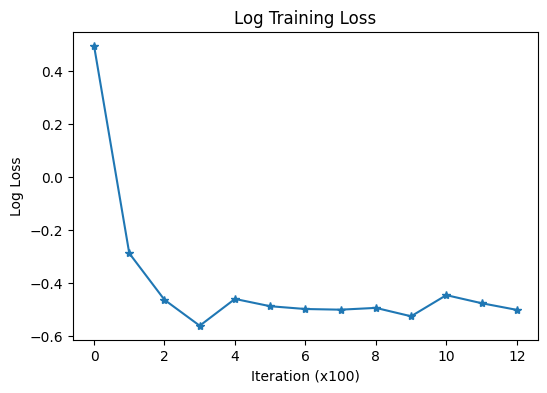

Trained estimator for k = 2. Number of NaN losses encountered: 45
44
Training progress: 0/1499
Training progress: 100/1499
Training progress: 200/1499
Training progress: 300/1499
Training progress: 400/1499
Training progress: 500/1499
Training progress: 600/1499
Training progress: 700/1499
Training progress: 800/1499
Training progress: 900/1499
Training progress: 1000/1499
Training progress: 1100/1499
Training progress: 1200/1499
Training progress: 1300/1499
Training progress: 1400/1499
Training took 25.75 seconds.
Number of NaN losses encountered: 0


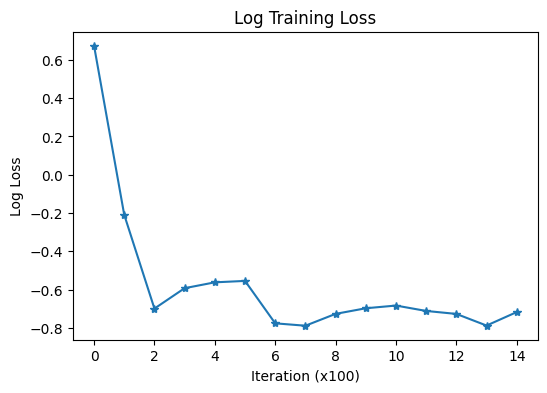

Trained estimator for k = 3. Number of NaN losses encountered: 0
44
Training progress: 0/1499
Training progress: 100/1499
Training progress: 200/1499
Training progress: 300/1499
Training progress: 400/1499
Training progress: 500/1499
Training progress: 600/1499
Training progress: 700/1499
Training progress: 800/1499
Training progress: 900/1499
Training progress: 1000/1499
Training progress: 1100/1499
Training progress: 1200/1499
Training progress: 1300/1499
Training progress: 1400/1499
Training took 24.95 seconds.
Number of NaN losses encountered: 6


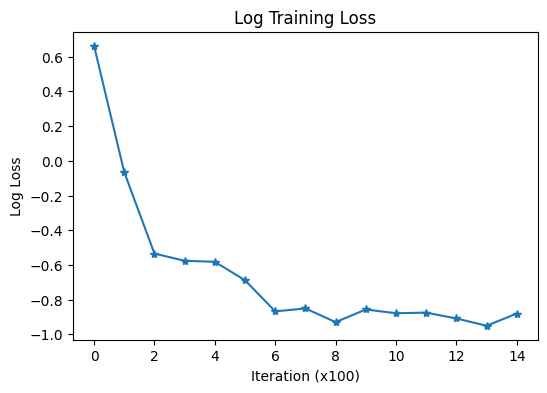

Trained estimator for k = 4. Number of NaN losses encountered: 6
44
Training progress: 0/1499
Training progress: 100/1499
Training progress: 200/1499
Training progress: 300/1499
Training progress: 400/1499
Training progress: 500/1499
Training progress: 600/1499
Training progress: 700/1499
Training progress: 800/1499
Training progress: 900/1499
Training progress: 1000/1499
Training progress: 1100/1499
Training progress: 1200/1499
Training progress: 1300/1499
Training progress: 1400/1499
Training took 27.96 seconds.
Number of NaN losses encountered: 0


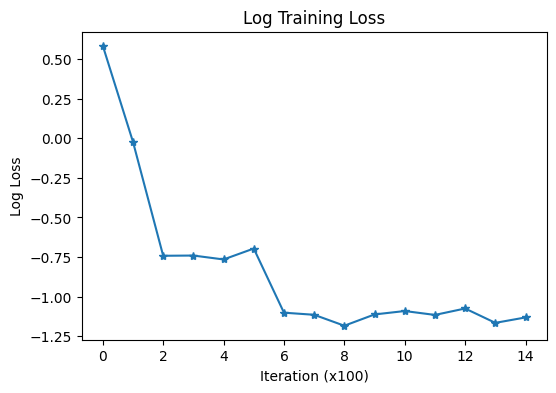

Trained estimator for k = 5. Number of NaN losses encountered: 0
44
Training progress: 0/1499
Training progress: 100/1499
Training progress: 200/1499
Training progress: 300/1499
Training progress: 400/1499
Training progress: 500/1499
Training progress: 600/1499
Training progress: 700/1499
Training progress: 800/1499
Training progress: 900/1499
Training progress: 1000/1499
Training progress: 1100/1499
Training progress: 1200/1499
Training progress: 1300/1499
Training progress: 1400/1499
Training took 30.50 seconds.
Number of NaN losses encountered: 0


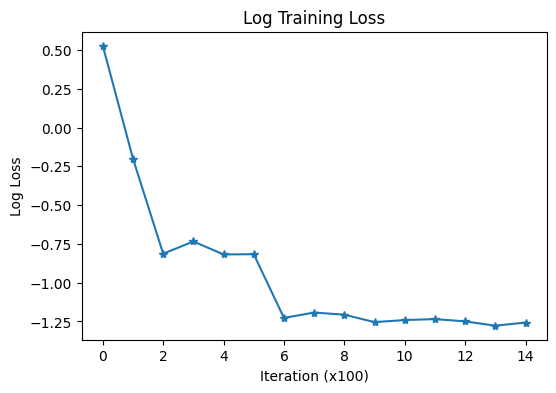

Trained estimator for k = 6. Number of NaN losses encountered: 0
44
Training progress: 0/1499
Training progress: 100/1499
Training progress: 200/1499
Training progress: 300/1499
Training progress: 400/1499
Training progress: 500/1499
Training progress: 600/1499
Training progress: 700/1499
Training progress: 800/1499
Training progress: 900/1499
Training progress: 1000/1499
Training progress: 1100/1499
Training progress: 1200/1499
Training progress: 1300/1499
Training progress: 1400/1499
Training took 31.64 seconds.
Number of NaN losses encountered: 0


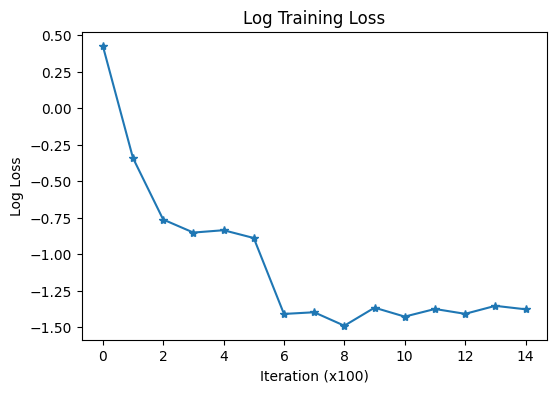

Trained estimator for k = 7. Number of NaN losses encountered: 0
44
Training progress: 0/1499
Training progress: 100/1499
Training progress: 200/1499
Training progress: 300/1499
Training progress: 400/1499
Training progress: 500/1499
Training progress: 600/1499
Training progress: 700/1499
Training progress: 800/1499
Training progress: 900/1499
Training progress: 1000/1499
Training progress: 1100/1499
Training progress: 1200/1499
Training progress: 1300/1499
Training progress: 1400/1499
Training took 32.38 seconds.
Number of NaN losses encountered: 0


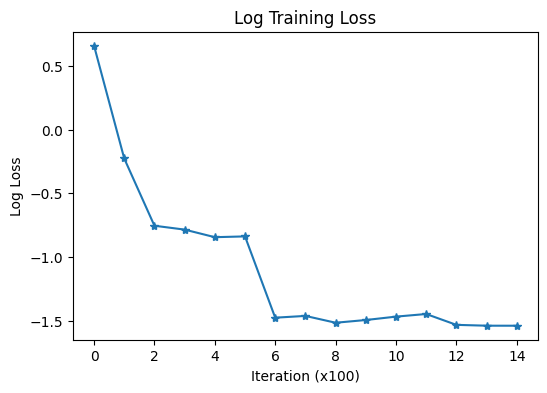

Trained estimator for k = 8. Number of NaN losses encountered: 0
44
Training progress: 0/1499
Training progress: 100/1499
Training progress: 200/1499
Training progress: 300/1499
Training progress: 400/1499
Training progress: 500/1499
Training progress: 600/1499
Training progress: 700/1499
Training progress: 800/1499
Training progress: 900/1499
Training progress: 1000/1499
Training progress: 1100/1499
Training progress: 1200/1499
Training progress: 1300/1499
Training progress: 1400/1499
Training took 32.53 seconds.
Number of NaN losses encountered: 0


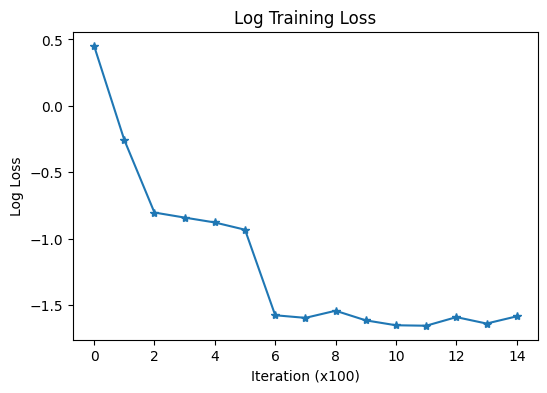

Trained estimator for k = 9. Number of NaN losses encountered: 0
44
Training progress: 0/1499
Training progress: 100/1499
Training progress: 200/1499
Training progress: 300/1499
Training progress: 400/1499
Training progress: 500/1499
Training progress: 600/1499
Training progress: 700/1499
Training progress: 800/1499
Training progress: 900/1499
Training progress: 1000/1499
Training progress: 1100/1499
Training progress: 1200/1499
Training progress: 1300/1499
Training progress: 1400/1499
Training took 33.68 seconds.
Number of NaN losses encountered: 0


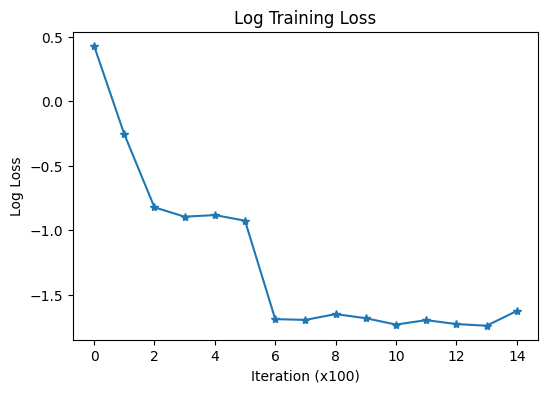

Trained estimator for k = 10. Number of NaN losses encountered: 0


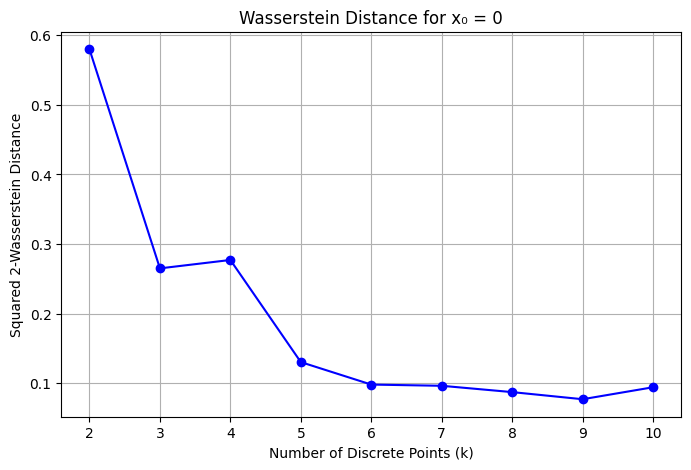

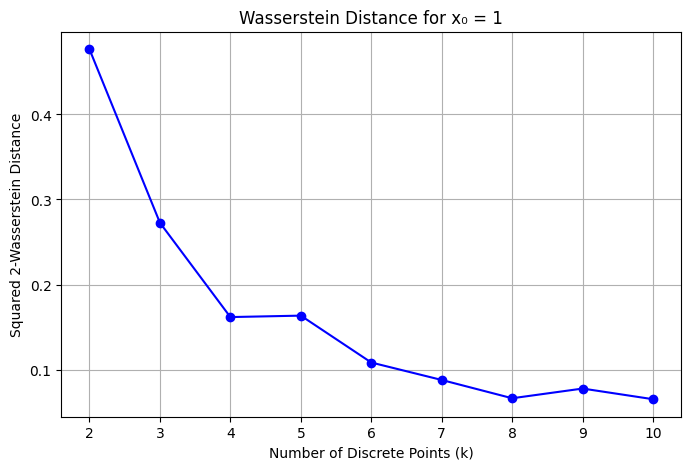

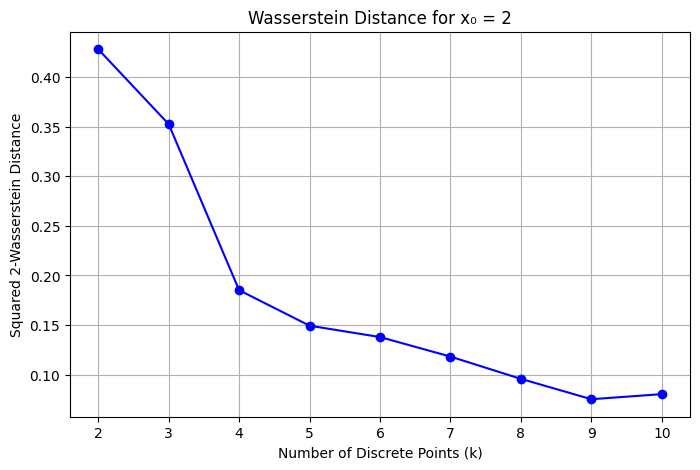

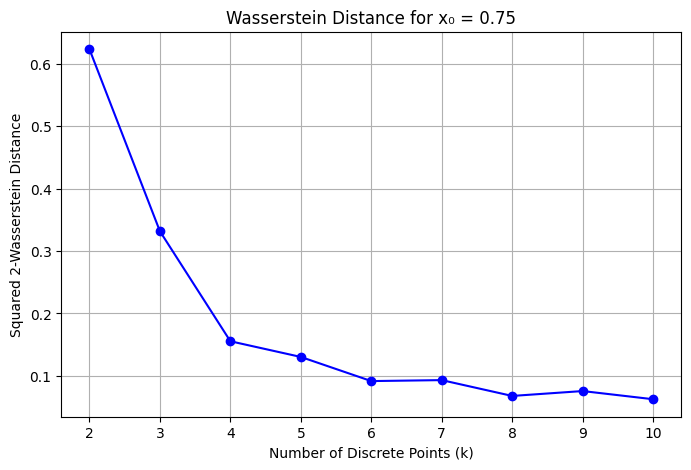

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import ot  # Make sure POT (Python Optimal Transport) is installed

# --- User defined functions ---

def compute_w2_squared(discrete_support, discrete_weights, true_support, true_weights):
    """
    Compute squared 2-Wasserstein distance between two discrete measures.
    discrete_support: 1D numpy array of support points (length m)
    discrete_weights: 1D numpy array of weights (length m, summing to 1)
    true_support: 1D numpy array of support points for the true measure (length n)
    true_weights: 1D numpy array of weights for the true measure (length n, summing to 1)
    """
    # Compute the squared Euclidean cost matrix between the supports.
    M = (discrete_support[:, None] - true_support[None, :])**2
    # ot.emd2 returns the squared Wasserstein distance
    return ot.emd2(discrete_weights, true_weights, M)

# --- Parameters and settings ---
x0_values = [0, 1, 2, 0.75]   # the four condition points for evaluation
k_values = range(2, 11)        # k from 2 to 10 (inclusive)
results = {x0: {} for x0 in x0_values}  # will store distances for each x0 and k

# device should be defined (e.g., device = torch.device('cuda') or 'cpu')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# data_tensor, d_X, d_Y, and other hyperparameters are assumed to be defined elsewhere
# For example:
# data_tensor = ...  (your training data as a torch tensor)
# d_X = ... ; d_Y = ...
# Also, the function train_conditional_density is assumed to be defined.
# n_iter, n_batch, lr, and nns_type are set as desired.

# --- Main Loop over k ---
for k in k_values:
    # Train the conditional density estimator for the current k.
    estimator, loss_hist, n_nan = train_conditional_density(
        data_tensor, d_X=d_X, d_Y=d_Y, k=k,
        n_iter=1500, n_batch=100, lr=1e-3, nns_type=' ', Lip = True
    )
    
    estimator.atomnet.to(device)
    estimator.atomnet.eval()
    print(f"Trained estimator for k = {k}. Number of NaN losses encountered: {n_nan}")
    
    # For each x0 value, evaluate the estimator and compute the Wasserstein distance.
    for x0 in x0_values:
        # Evaluate the estimator at x0 (make sure to use a torch tensor of shape [1,1])
        with torch.no_grad():
            x0_tensor = torch.tensor([[x0]], dtype=torch.float32, device=device)
            y_est = estimator.atomnet(x0_tensor)  # assume output shape is [1, k]

        # Convert the output to a 1D numpy array
        y_est_np = y_est.cpu().numpy().flatten()
        
        # Define the estimated measure: k points with uniform weight 1/k.
        weights_est = np.ones(k) / k

        # Create a grid for the true measure. We choose a grid centered at x0.
        y_min = x0 - 5
        y_max = x0 + 5
        y_grid = np.linspace(y_min, y_max, 800)
        dx = y_grid[1] - y_grid[0]
        
        # Construct the true measure as the discretization of N(x0, 1)
        true_pdf = norm.pdf(y_grid, loc=x0, scale=1)
        true_weights = true_pdf * dx
        true_weights = true_weights / np.sum(true_weights)
        
        # Compute the squared Wasserstein distance.
        distance = compute_w2_squared(y_est_np, weights_est, y_grid, true_weights)
        
        # Store the result
        results[x0][k] = distance

# --- Plotting: one plot per x0 ---
for x0 in x0_values:
    ks = sorted(results[x0].keys())
    distances = [results[x0][k] for k in ks]
    
    plt.figure(figsize=(8, 5))
    plt.plot(ks, distances, marker='o', linestyle='-', color='blue')
    plt.xlabel('Number of Discrete Points (k)')
    plt.ylabel('Squared 2-Wasserstein Distance')
    plt.title(f'Wasserstein Distance for x₀ = {x0}')
    plt.grid(True)
    plt.show()

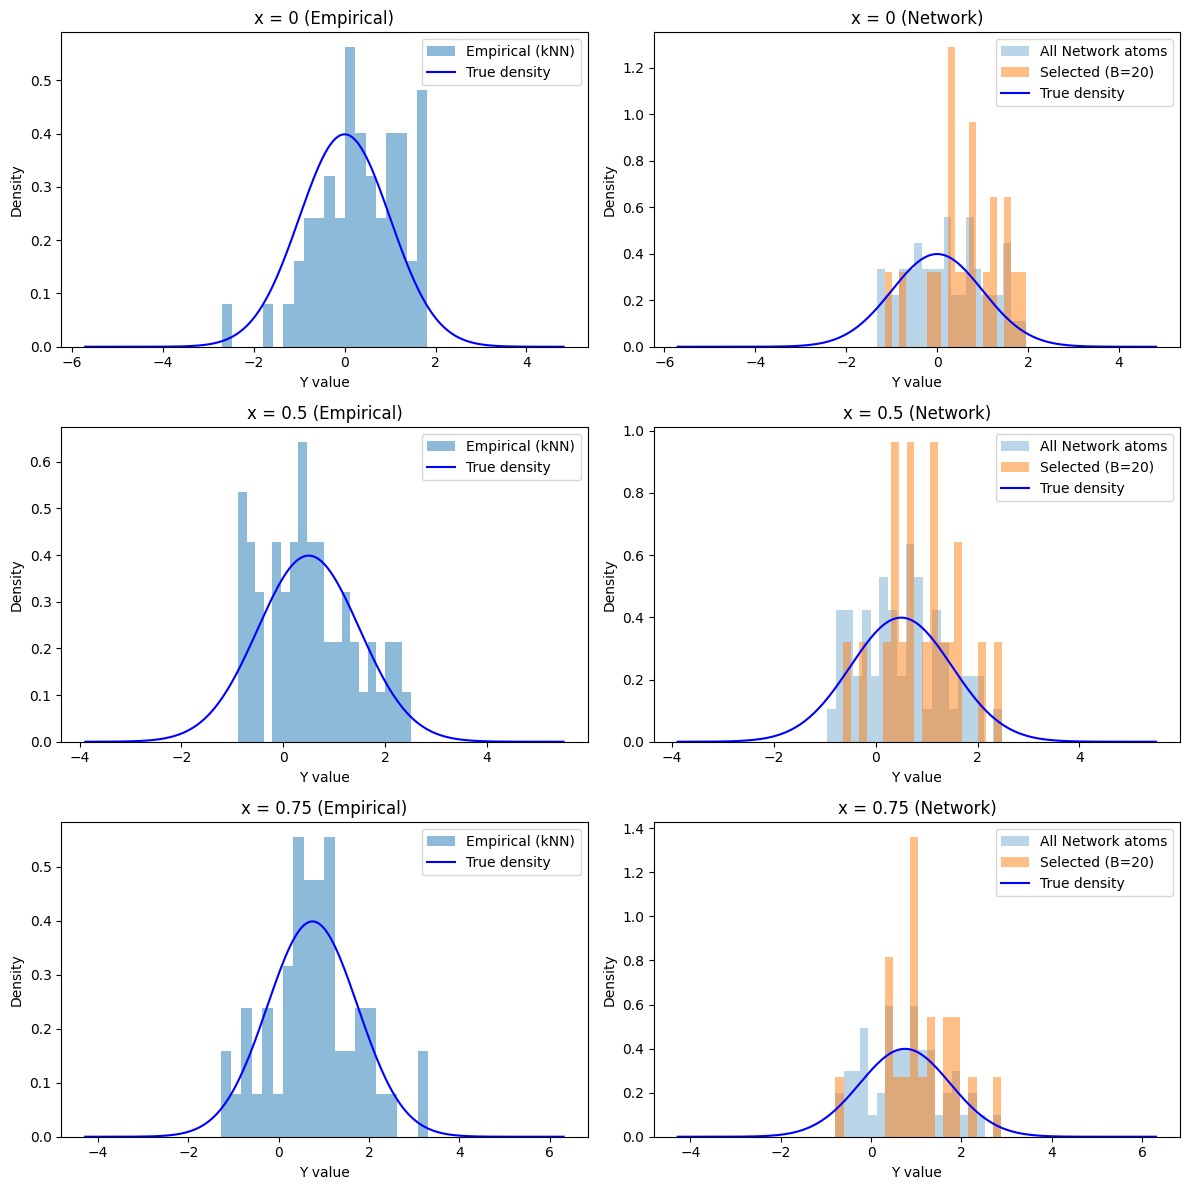

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Evaluate the estimator at a few x values.
x_values = [0, 0.5, 0.75]
B = 20  # choose B atoms out of k
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
    
for i, x0 in enumerate(x_values):
    # Get network-predicted atoms.
    all_atoms = evaluate_conditional_density(estimator, x0, B=None)
    selected_atoms = evaluate_conditional_density(estimator, x0, B=B)
        
    # Empirical measure: kNN using data_tensor.
    X_data = data_tensor[:, 0].cpu().numpy()
    Y_data = data_tensor[:, 1].cpu().numpy()
    distances = np.abs(X_data - x0)
    indices = np.argsort(distances)[:55]
    empirical_Y = Y_data[indices]
        
    # True conditional density (assumed Normal with mean=x0, std=1)
    y_min = np.min(empirical_Y) - 3
    y_max = np.max(empirical_Y) + 3
    y_vals = np.linspace(y_min, y_max, 200)
    true_density = norm.pdf(y_vals, loc=x0, scale=1)
        
    # Left plot: Empirical (kNN)
    ax = axs[i, 0]
    ax.hist(empirical_Y, bins=20, density=True, alpha=0.5, label='Empirical (kNN)')
    ax.plot(y_vals, true_density, 'b-', label='True density')
    ax.set_title('x = {} (Empirical)'.format(x0))
    ax.set_xlabel('Y value')
    ax.set_ylabel('Density')
    ax.legend()
    # Right plot: Network atoms (all vs. selected)
    ax = axs[i, 1]
    ax.hist(all_atoms, bins=20, density=True, alpha=0.3, label='All Network atoms')
    ax.hist(selected_atoms, bins=20, density=True, alpha=0.5, label='Selected (B={})'.format(B))
    ax.plot(y_vals, true_density, 'b-', label='True density')
    ax.set_title('x = {} (Network)'.format(x0))
    ax.set_xlabel('Y value')
    ax.set_ylabel('Density')
    ax.legend()
    
plt.tight_layout()
plt.show()
